## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data wrangling
#### 3. Data prep for regression analysis
#### 4. Regression analysis


### 1. Importing libraries and data

In [1]:
##01 Importing libraries and functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
##02 This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
##03 Importing cleaned df
df = pd.read_csv('/Users/emmawilcox/Desktop/camper_grouped_distance.csv')

/var/folders/9f/xmbzlyxs1bs39h_7cq6c9vq00000gn/T/ipykernel_6305/708251405.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/emmawilcox/Desktop/camper_grouped_distance.csv')


### 2. Data Wrangling

In [4]:
## 04 Reducing df to just columns needed Part 1
columns_to_keep2 = ['nights', 'numberofpeople', 'distance', 'totalbeforetax']


In [5]:
## 05 Reducing df to just columns needed Part 2
df = df[columns_to_keep2]

In [6]:
## 06 Checking just 4 columns present
df.shape

(1692421, 4)

### 3. Data prep for regression analysis 

In [7]:
## 07 Reshape the variables into NumPy arrays and put them into separate objects.
##Creating model to reflect both kinds of users as plts were similar

X = df['distance'].values.reshape(-1,1)
y = df['numberofpeople'].values.reshape(-1,1)

In [8]:
## 08 Looking at X
X

array([[ 122.82078408],
       [  56.78525755],
       [ 103.58320039],
       ...,
       [1505.21820349],
       [2126.99764313],
       [1030.61365472]])

In [9]:
## 09 Looking at Y
y

array([[12],
       [ 4],
       [12],
       ...,
       [ 4],
       [ 3],
       [ 4]])

In [10]:
## 10 Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [11]:
## 11 Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [12]:
## 12 Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [13]:
## 13 Predict the values of y using X.

y_predicted = regression.predict(X_test)

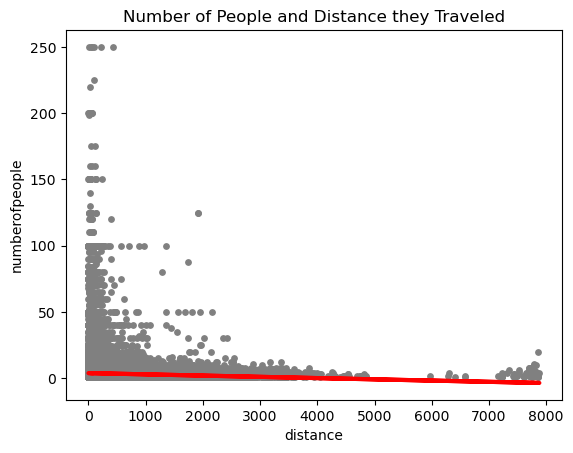

In [15]:
## 14 Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of People and Distance they Traveled')
plot_test.xlabel('distance')
plot_test.ylabel('numberofpeople')
plot_test.show()

In [16]:
## 15 Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [17]:
## 16 Print the model summary statistics. This is where you evaluate the performance of the model.
## If the R2 is a percentage of out of 100, so an R2 of 0.01 is not good. 
## The MSE seems low, but the model is not performing terribly well

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00094011]]
Mean squared error:  18.396662359598597
R2 score:  0.010448190205133323


In [18]:
## 17
y_predicted

array([[3.77164252],
       [3.56965871],
       [3.53188444],
       ...,
       [3.76541939],
       [3.75698824],
       [3.78398754]])

In [19]:
## 18 Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2,3.771643
1,16,3.569659
2,2,3.531884
3,2,3.744933
4,1,3.660746
5,2,3.813023
6,6,3.817562
7,1,3.439893
8,2,3.648028
9,4,3.397439


##### Compare how the regression fits the training set

In [20]:
## 19 Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [21]:
## 20 Getting the summary stats for the model used on training set
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [22]:
## 21 Model is not overfit, it just isn't great
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00094011]]
Mean squared error:  18.031411161893836
R2 score:  0.010930245467346777


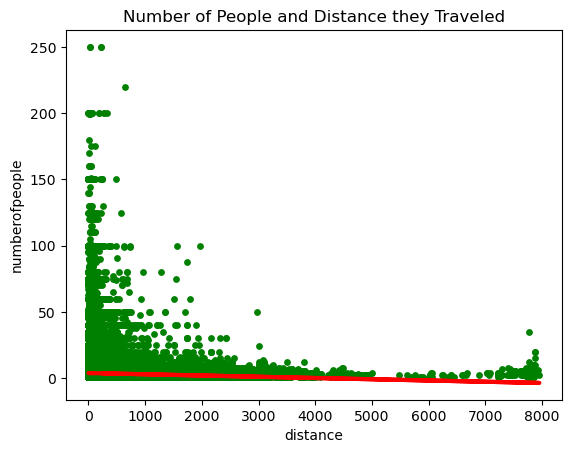

In [23]:
## 22 Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of People and Distance they Traveled')
plot_test.xlabel('distance')
plot_test.ylabel('numberofpeople')
plot_test.show()